In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# path2inputdata = '/Users/y1u0d2/desktop/Lab/result/n2p2/Si/67/data'
path2inputdata = '/Users/y1u0d2/desktop/Lab/result/n2p2/Si/88/data'
# path2inputdata = '/Users/y1u0d2/desktop/Lab/result/nnp-train/two-three-body/02/01'
i_filename = 'input.data'

In [3]:
from analyze.n2p2_lattice import N2p2Lattice, get_structures_for_n2p2_lattice

structures = get_structures_for_n2p2_lattice(path2inputdata, i_filename)

In [4]:
print(f'number of structures: {len(structures)}')

number of structures: 54614


In [5]:
result = []
mpid_list = []

for structure in structures:
    n2p2_lattice = N2p2Lattice(structure)

    if 'dimer' in n2p2_lattice.mpid:
        continue

    mpid_list.append(n2p2_lattice.mpid)
    result.append([
        n2p2_lattice.n_atoms,
        n2p2_lattice.energy,
        n2p2_lattice.vol,
        n2p2_lattice.path
    ])

df = pd.DataFrame(data=result, columns=['n_atoms', 'energy', 'vol', 'path'])
df['mpid'] = mpid_list
df['energy_atom'] = df['energy'] / df['n_atoms']
df['vol_atom'] = df['vol'] / df['n_atoms']

In [6]:
df['mpid'].value_counts()

mp-149        39320
mp-92          5039
mp-1079649     3653
mp-165         3422
mp-571520      3142
Name: mpid, dtype: int64

In [7]:
df = df.drop(df.query('mpid == "mp-149_dimer"').index)

<AxesSubplot: xlabel='volume per atom (ang^3)', ylabel='energy per atom (eV)'>

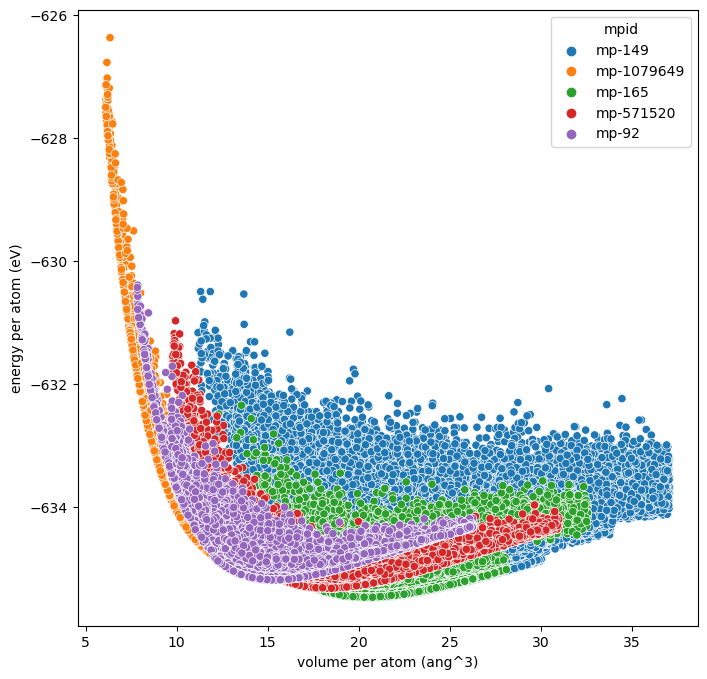

In [8]:
import seaborn as sns

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.set_xlabel('volume per atom (ang^3)')
ax.set_ylabel('energy per atom (eV)')

sns.scatterplot(data=df, x='vol_atom', y='energy_atom', hue='mpid', ax=ax)

In [9]:
min_e = df['energy_atom'].min()
df.query('energy_atom == @min_e')['path']

250    /Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149/...
Name: path, dtype: object

In [10]:
print(df.query('energy_atom == @min_e')['path'].values)

['/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149/coord/sd/02/result/scf_50']


In [11]:
force_df_list = []
mpid_list = []


for structure in structures:
    n2p2_lattice = N2p2Lattice(structure)

    # if 'dimer' in n2p2_lattice.mpid:
    #     continue

    each_df = pd.DataFrame(data=n2p2_lattice.force, columns=['fx', 'fy', 'fz'])
    each_df['mpid'] = n2p2_lattice.mpid
    force_df_list.append(each_df.copy())

force_df = pd.concat(force_df_list)

<AxesSubplot: xlabel='fx', ylabel='fz'>

/Users/y1u0d2/opt/anaconda3/envs/ml/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/y1u0d2/opt/anaconda3/envs/ml/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


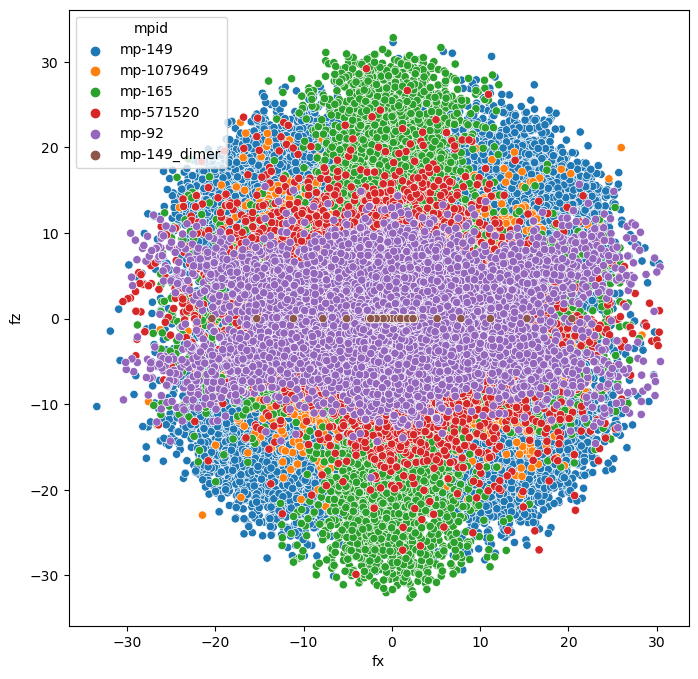

In [12]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

sns.scatterplot(data=force_df, x='fx', y='fz', hue='mpid', ax=ax)

In [13]:
coord_df_list = []
mpid_list = []


for structure in structures:
    n2p2_lattice = N2p2Lattice(structure)

    # if 'mp-149' in n2p2_lattice.mpid:
    #     continue

    each_df = pd.DataFrame(data=n2p2_lattice.coord, columns=['x', 'y', 'z'])
    each_df['mpid'] = n2p2_lattice.mpid
    coord_df_list.append(each_df.copy())

coord_df = pd.concat(coord_df_list)

In [14]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

sns.scatterplot(data=coord_df, x='x', y='y', hue='mpid', ax=ax)

<AxesSubplot: xlabel='x', ylabel='y'>

In [ ]:
from scf.qelattice import get_qel


result = []
for structure in structures:
    n2p2_lattice = N2p2Lattice(structure)

    if 'dimer' in n2p2_lattice.mpid:
        continue

    qel = get_qel(n2p2_lattice.path)
    result.append([
        qel.num_atom,
        qel.get_energy(),
        qel.get_vol(),
        qel.structure_id
    ])

df = pd.DataFrame(data=result, columns=['n_atoms', 'energy', 'vol', 'mpid'])
df['energy_atom'] = df['energy'] / df['n_atoms']
df['vol_atom'] = df['vol'] / df['n_atoms']

<AxesSubplot: xlabel='vol_atom', ylabel='energy_atom'>

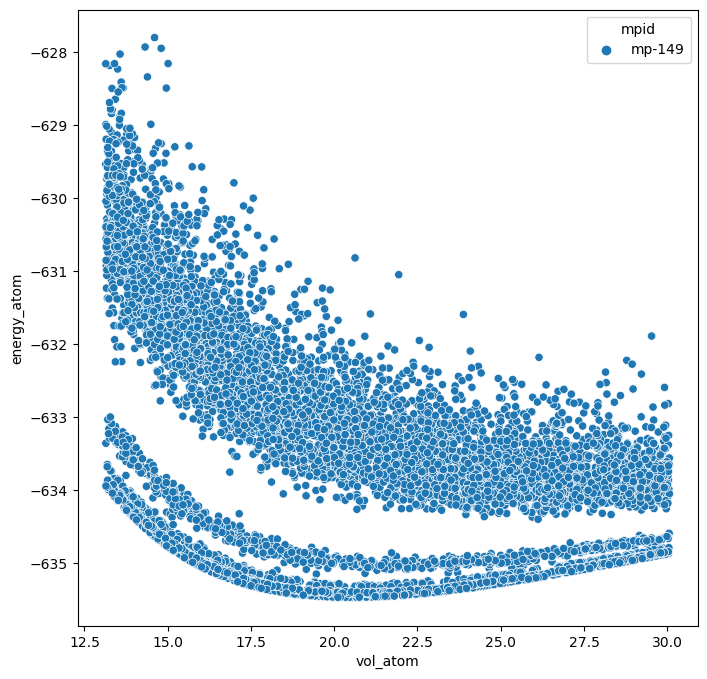

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
sns.scatterplot(data=df, x='vol_atom', y='energy_atom', hue='mpid', ax=ax)

In [ ]:
force_df_list = []

for structure in structures:
    n2p2_lattice = N2p2Lattice(structure)

    if 'mp-149_dimer' in n2p2_lattice.mpid:
        continue

    qel = get_qel(n2p2_lattice.path)
    each_df = pd.DataFrame(data=qel.get_force(), columns=['fx', 'fy', 'fz'])
    each_df['mpid'] = n2p2_lattice.mpid
    force_df_list.append(each_df.copy())

force_df = pd.concat(force_df_list)

<AxesSubplot: xlabel='fx', ylabel='fz'>

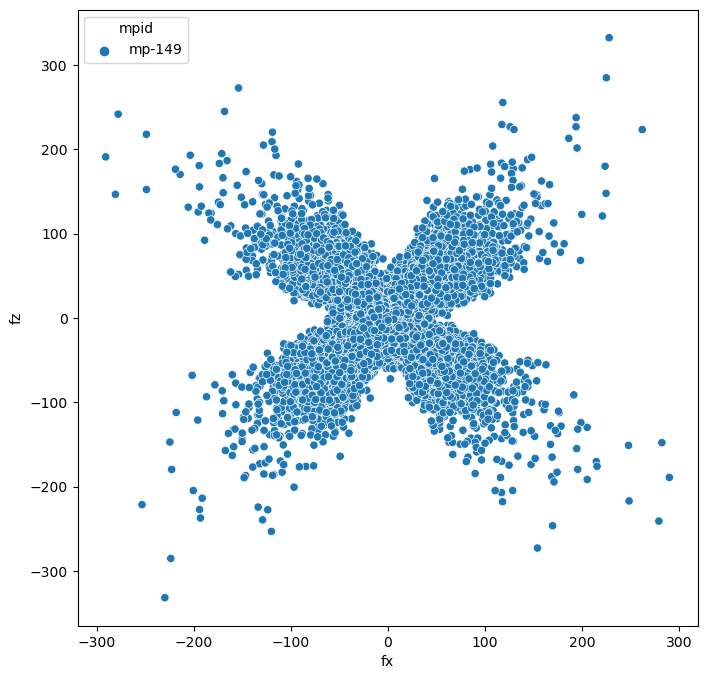

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

sns.scatterplot(data=force_df, x='fx', y='fz', hue='mpid', ax=ax)